<a href="https://colab.research.google.com/github/Rhitz008/Projects/blob/main/Backpack_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Loading Datasets

In [ ]:
train_df = pd.read_csv('/content/train_BPC.csv')
test_df = pd.read_csv('/content/test_BPC.csv')
train_extra_df = pd.read_csv('/content/training_extra_BPC.csv')

In [ ]:
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
train_extra_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


# Making copy of train and test datasets

In [ ]:
train_df_c = train_df
test_df_c = test_df
train_extra_df_c = train_extra_df

In [ ]:
train_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
test_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
train_extra_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [ ]:
X_train = train_df.drop(columns = ['Price','id'])
X_train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338


In [ ]:
y_train = train_df['Price']
y_train.head()

,Price
0,112.15875
1,68.88056
2,39.17320
3,80.60793
4,86.02312


In [ ]:
#Making copy of X_train

X_train_c = X_train
X_train_c.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338


In [ ]:
print(X_train.shape, X_train_c.shape, y_train.shape)



(300000, 9) (300000, 9) (300000,)


In [ ]:
# Using train_extra_df to split into train and test to get some test data

X = train_extra_df.drop(columns=['Price', 'id'])
y = train_extra_df['Price']

In [ ]:
X_train_extra, X_test, y_train_extra, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
print(X_test.shape, y_test.shape)

(369432, 9) (369432,)


# EDA

In [ ]:
train_df_c.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [ ]:
train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)

<ipython-input-19-1c395500adcd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)


In [ ]:
train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
train_df_c['Size'].fillna(train_df_c['Size'].mode()[0], inplace = True)
train_df_c['Laptop Compartment'].fillna(train_df_c['Laptop Compartment'].mode()[0], inplace = True)
train_df_c['Waterproof'].fillna(train_df_c['Waterproof'].mode()[0], inplace = True)
train_df_c['Style'].fillna(train_df_c['Style'].mode()[0], inplace = True)
train_df_c['Color'].fillna(train_df_c['Color'].mode()[0], inplace = True)

<ipython-input-20-d0bb4b339983>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
<ipython-input-20-d0bb4b339983>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

<Axes: xlabel='Weight Capacity (kg)', ylabel='Count'>

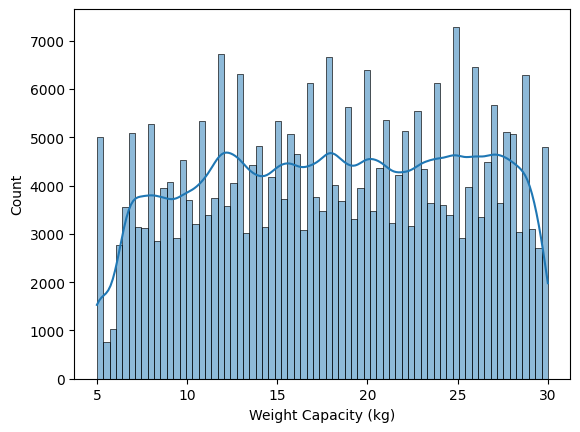

In [ ]:
sns.histplot(train_df_c['Weight Capacity (kg)'], bins = 'auto', kde = True)

<Axes: ylabel='Weight Capacity (kg)'>

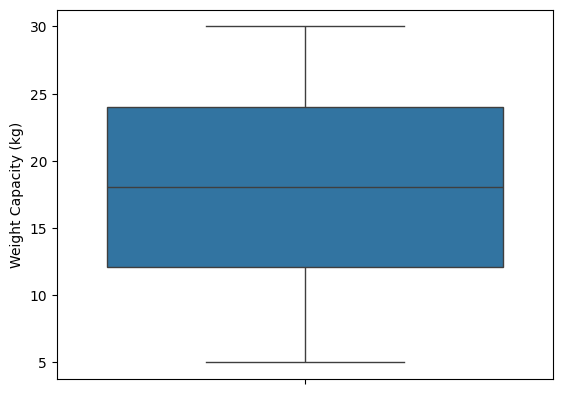

In [ ]:
sns.boxplot(train_df_c['Weight Capacity (kg)'])

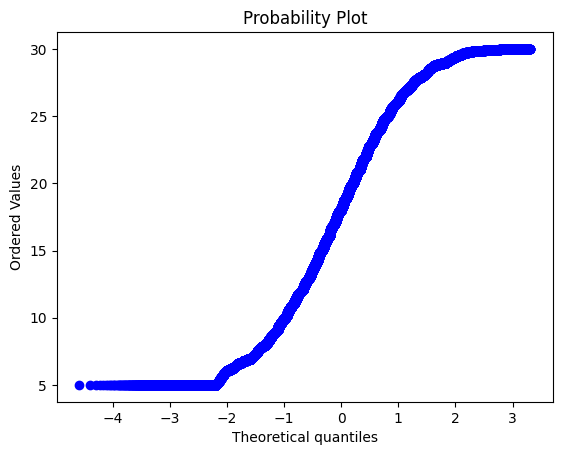

In [ ]:
stats.probplot(train_df_c['Weight Capacity (kg)'], dist = 'norm', plot = plt)
plt.show()

In [ ]:
stat, p = shapiro(train_df_c['Weight Capacity (kg)'])
print(f'p-value = {p}')

p-value = nan


In [ ]:
train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)

<ipython-input-25-fc1207f46dd0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)


In [ ]:
stat, p = normaltest(train_df_c['Weight Capacity (kg)'])
print(f'p-value = {p}')

p-value = 0.0


In [ ]:
stat, p = kstest(train_df_c['Weight Capacity (kg)'], 'norm')
print(f'p-value = {p}')

p-value = 0.0


In [ ]:
skewness_val = skew(train_df_c['Weight Capacity (kg)'])
print(f'skewness = {skewness_val}')

skewness = -0.0642611148865594


In [ ]:
train_df_c['Weight Capacity[Box]'], lambda_ = boxcox(train_df_c['Weight Capacity (kg)'] + abs(min(train_df_c['Weight Capacity (kg)'])) - 1)

In [ ]:
skewness_val = skew(train_df_c['Weight Capacity[Box]'])
print(f'skewness = {skewness_val}')

skewness = -0.11752000914122043


In [ ]:
train_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Weight Capacity[Box]
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,11.590309
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,22.168877
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,15.131711
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,12.535069
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,15.894828


In [ ]:
train_df_c.drop(columns = ['Weight Capacity[Box]'], inplace = True)

In [ ]:
train_df_c['Weight Capacity [Square]'] = np.square(train_df_c['Weight Capacity (kg)'])

In [ ]:
skewness_val = skew(train_df_c['Weight Capacity [Square]'])
print(f'skewness = {skewness_val}')

skewness = 0.4105210223773418


In [ ]:
train_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Weight Capacity [Square]
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,134.832107
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,733.247143
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,277.014745
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,167.371669
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,315.039016


In [ ]:
skewness_val = skew(train_df_c['Compartments'])
print(f'skewness = {skewness_val}')

skewness = 0.02912438345692783


In [ ]:
train_df_c.drop(columns = ['Weight Capacity [Square]'], inplace = True)

In [ ]:
train_df_c.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


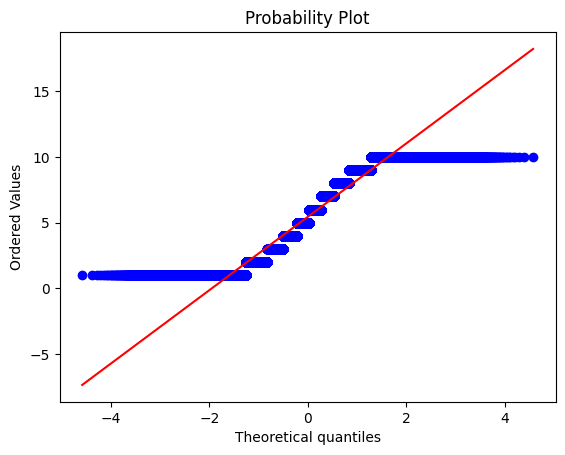

In [ ]:
stats.probplot(train_df_c['Compartments'], dist = 'norm', plot = plt)
plt.show()

In [ ]:
stat, p = kstest(train_df_c['Weight Capacity (kg)'], 'norm')
print(f'p-value = {p}')

p-value = 0.0


In [ ]:
X_train_c.isnull().sum()

,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [ ]:
code = """
train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)
train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)
train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
train_df_c['Size'].fillna(train_df_c['Size'].mode()[0], inplace = True)
train_df_c['Laptop Compartment'].fillna(train_df_c['Laptop Compartment'].mode()[0], inplace = True)
train_df_c['Waterproof'].fillna(train_df_c['Waterproof'].mode()[0], inplace = True)
train_df_c['Style'].fillna(train_df_c['Style'].mode()[0], inplace = True)
train_df_c['Color'].fillna(train_df_c['Color'].mode()[0], inplace = True)
"""

code = code.replace('train_df_c', 'X_train')

print(code)


X_train['Weight Capacity (kg)'].fillna(X_train['Weight Capacity (kg)'].median(), inplace = True)
X_train['Brand'].fillna(X_train['Brand'].mode()[0], inplace = True)
X_train['Material'].fillna(X_train['Material'].mode()[0], inplace = True)
X_train['Size'].fillna(X_train['Size'].mode()[0], inplace = True)
X_train['Laptop Compartment'].fillna(X_train['Laptop Compartment'].mode()[0], inplace = True)
X_train['Waterproof'].fillna(X_train['Waterproof'].mode()[0], inplace = True)
X_train['Style'].fillna(X_train['Style'].mode()[0], inplace = True)
X_train['Color'].fillna(X_train['Color'].mode()[0], inplace = True)



In [ ]:
X_train_c['Brand'].fillna(X_train_c['Brand'].mode()[0], inplace = True)
X_train_c['Material'].fillna(X_train_c['Material'].mode()[0], inplace = True)
X_train_c['Size'].fillna(X_train_c['Size'].mode()[0], inplace = True)
X_train_c['Laptop Compartment'].fillna(X_train_c['Laptop Compartment'].mode()[0], inplace = True)
X_train_c['Waterproof'].fillna(X_train_c['Waterproof'].mode()[0], inplace = True)
X_train_c['Style'].fillna(X_train_c['Style'].mode()[0], inplace = True)
X_train_c['Color'].fillna(X_train_c['Color'].mode()[0], inplace = True)

<ipython-input-43-e607b981980e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_c['Brand'].fillna(X_train_c['Brand'].mode()[0], inplace = True)
<ipython-input-43-e607b981980e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
X_train['Weight Capacity (kg)'].fillna(X_train['Weight Capacity (kg)'].median(), inplace = True)
X_train['Brand'].fillna(X_train['Brand'].mode()[0], inplace = True)
X_train['Material'].fillna(X_train['Material'].mode()[0], inplace = True)
X_train['Size'].fillna(X_train['Size'].mode()[0], inplace = True)
X_train['Laptop Compartment'].fillna(X_train['Laptop Compartment'].mode()[0], inplace = True)
X_train['Waterproof'].fillna(X_train['Waterproof'].mode()[0], inplace = True)
X_train['Style'].fillna(X_train['Style'].mode()[0], inplace = True)
X_train['Color'].fillna(X_train['Color'].mode()[0], inplace = True)


<ipython-input-44-b296b6df564f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Weight Capacity (kg)'].fillna(X_train['Weight Capacity (kg)'].median(), inplace = True)


In [ ]:
X_train.isnull().sum()

,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0


In [ ]:
X_train.shape

(300000, 9)

In [ ]:
X_train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338


In [ ]:
unique_values = X_train.nunique()
print(unique_values)

Brand                        5
Material                     4
Size                         3
Compartments                10
Laptop Compartment           2
Waterproof                   2
Style                        3
Color                        6
Weight Capacity (kg)    181596
dtype: int64


In [ ]:
columns = ['Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments']

for col in columns:
    print(f"Unique values in {col}: {X_train[col].unique()}\n")

Unique values in Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma']

Unique values in Material: ['Leather' 'Canvas' 'Nylon' 'Polyester']

Unique values in Size: ['Medium' 'Small' 'Large']

Unique values in Style: ['Tote' 'Messenger' 'Backpack']

Unique values in Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink']

Unique values in Compartments: [ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]



In [ ]:
X_test.isnull().sum()

,0
Brand,11817
Material,10357
Size,8041
Compartments,0
Laptop Compartment,9159
Waterproof,8769
Style,9588
Color,12276
Weight Capacity (kg),174


In [ ]:
code = """
train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)
train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)
train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
train_df_c['Size'].fillna(train_df_c['Size'].mode()[0], inplace = True)
train_df_c['Laptop Compartment'].fillna(train_df_c['Laptop Compartment'].mode()[0], inplace = True)
train_df_c['Waterproof'].fillna(train_df_c['Waterproof'].mode()[0], inplace = True)
train_df_c['Style'].fillna(train_df_c['Style'].mode()[0], inplace = True)
train_df_c['Color'].fillna(train_df_c['Color'].mode()[0], inplace = True)
"""

code = code.replace('train_df_c', 'X_test')

print(code)


X_test['Weight Capacity (kg)'].fillna(X_test['Weight Capacity (kg)'].median(), inplace = True)
X_test['Brand'].fillna(X_test['Brand'].mode()[0], inplace = True)
X_test['Material'].fillna(X_test['Material'].mode()[0], inplace = True)
X_test['Size'].fillna(X_test['Size'].mode()[0], inplace = True)
X_test['Laptop Compartment'].fillna(X_test['Laptop Compartment'].mode()[0], inplace = True)
X_test['Waterproof'].fillna(X_test['Waterproof'].mode()[0], inplace = True)
X_test['Style'].fillna(X_test['Style'].mode()[0], inplace = True)
X_test['Color'].fillna(X_test['Color'].mode()[0], inplace = True)



In [ ]:
X_test['Weight Capacity (kg)'].fillna(X_test['Weight Capacity (kg)'].median(), inplace = True)
X_test['Brand'].fillna(X_test['Brand'].mode()[0], inplace = True)
X_test['Material'].fillna(X_test['Material'].mode()[0], inplace = True)
X_test['Size'].fillna(X_test['Size'].mode()[0], inplace = True)
X_test['Laptop Compartment'].fillna(X_test['Laptop Compartment'].mode()[0], inplace = True)
X_test['Waterproof'].fillna(X_test['Waterproof'].mode()[0], inplace = True)
X_test['Style'].fillna(X_test['Style'].mode()[0], inplace = True)
X_test['Color'].fillna(X_test['Color'].mode()[0], inplace = True)

<ipython-input-52-42d6fa6326a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Weight Capacity (kg)'].fillna(X_test['Weight Capacity (kg)'].median(), inplace = True)
<ipython-input-52-42d6fa6326a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
test_df.isnull().sum()

,0
id,0
Brand,6227
Material,5613
Size,4381
Compartments,0
Laptop Compartment,4962
Waterproof,4811
Style,5153
Color,6785
Weight Capacity (kg),77


In [ ]:
code = """
train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)
train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)
train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
train_df_c['Size'].fillna(train_df_c['Size'].mode()[0], inplace = True)
train_df_c['Laptop Compartment'].fillna(train_df_c['Laptop Compartment'].mode()[0], inplace = True)
train_df_c['Waterproof'].fillna(train_df_c['Waterproof'].mode()[0], inplace = True)
train_df_c['Style'].fillna(train_df_c['Style'].mode()[0], inplace = True)
train_df_c['Color'].fillna(train_df_c['Color'].mode()[0], inplace = True)
"""

code = code.replace('train_df_c', 'test_df')

print(code)


test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].median(), inplace = True)
test_df['Brand'].fillna(test_df['Brand'].mode()[0], inplace = True)
test_df['Material'].fillna(test_df['Material'].mode()[0], inplace = True)
test_df['Size'].fillna(test_df['Size'].mode()[0], inplace = True)
test_df['Laptop Compartment'].fillna(test_df['Laptop Compartment'].mode()[0], inplace = True)
test_df['Waterproof'].fillna(test_df['Waterproof'].mode()[0], inplace = True)
test_df['Style'].fillna(test_df['Style'].mode()[0], inplace = True)
test_df['Color'].fillna(test_df['Color'].mode()[0], inplace = True)



In [ ]:
test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].median(), inplace = True)
test_df['Brand'].fillna(test_df['Brand'].mode()[0], inplace = True)
test_df['Material'].fillna(test_df['Material'].mode()[0], inplace = True)
test_df['Size'].fillna(test_df['Size'].mode()[0], inplace = True)
test_df['Laptop Compartment'].fillna(test_df['Laptop Compartment'].mode()[0], inplace = True)
test_df['Waterproof'].fillna(test_df['Waterproof'].mode()[0], inplace = True)
test_df['Style'].fillna(test_df['Style'].mode()[0], inplace = True)
test_df['Color'].fillna(test_df['Color'].mode()[0], inplace = True)

<ipython-input-56-94b47126d4f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].median(), inplace = True)
<ipython-input-56-94b47126d4f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [ ]:
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,Adidas,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
code = """
train_df_c['Weight Capacity (kg)'].fillna(train_df_c['Weight Capacity (kg)'].median(), inplace = True)
train_df_c['Brand'].fillna(train_df_c['Brand'].mode()[0], inplace = True)
train_df_c['Material'].fillna(train_df_c['Material'].mode()[0], inplace = True)
train_df_c['Size'].fillna(train_df_c['Size'].mode()[0], inplace = True)
train_df_c['Laptop Compartment'].fillna(train_df_c['Laptop Compartment'].mode()[0], inplace = True)
train_df_c['Waterproof'].fillna(train_df_c['Waterproof'].mode()[0], inplace = True)
train_df_c['Style'].fillna(train_df_c['Style'].mode()[0], inplace = True)
train_df_c['Color'].fillna(train_df_c['Color'].mode()[0], inplace = True)
"""

code = code.replace('train_df_c', 'X_train_extra')

print(code)


X_train_extra['Weight Capacity (kg)'].fillna(X_train_extra['Weight Capacity (kg)'].median(), inplace = True)
X_train_extra['Brand'].fillna(X_train_extra['Brand'].mode()[0], inplace = True)
X_train_extra['Material'].fillna(X_train_extra['Material'].mode()[0], inplace = True)
X_train_extra['Size'].fillna(X_train_extra['Size'].mode()[0], inplace = True)
X_train_extra['Laptop Compartment'].fillna(X_train_extra['Laptop Compartment'].mode()[0], inplace = True)
X_train_extra['Waterproof'].fillna(X_train_extra['Waterproof'].mode()[0], inplace = True)
X_train_extra['Style'].fillna(X_train_extra['Style'].mode()[0], inplace = True)
X_train_extra['Color'].fillna(X_train_extra['Color'].mode()[0], inplace = True)



In [ ]:
X_train_extra['Weight Capacity (kg)'].fillna(X_train_extra['Weight Capacity (kg)'].median(), inplace = True)
X_train_extra['Brand'].fillna(X_train_extra['Brand'].mode()[0], inplace = True)
X_train_extra['Material'].fillna(X_train_extra['Material'].mode()[0], inplace = True)
X_train_extra['Size'].fillna(X_train_extra['Size'].mode()[0], inplace = True)
X_train_extra['Laptop Compartment'].fillna(X_train_extra['Laptop Compartment'].mode()[0], inplace = True)
X_train_extra['Waterproof'].fillna(X_train_extra['Waterproof'].mode()[0], inplace = True)
X_train_extra['Style'].fillna(X_train_extra['Style'].mode()[0], inplace = True)
X_train_extra['Color'].fillna(X_train_extra['Color'].mode()[0], inplace = True)

<ipython-input-59-cbccceef7a71>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_extra['Weight Capacity (kg)'].fillna(X_train_extra['Weight Capacity (kg)'].median(), inplace = True)
<ipython-input-59-cbccceef7a71>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

# Implementing ANOVA

In [ ]:
# List of categorical columns
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Run ANOVA for each categorical column
for col in categorical_columns:
    groups = [train_df['Price'][train_df[col] == category] for category in train_df[col].unique()]
    stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA for {col}: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"✅ {col} has a significant relationship with Price_Category.\n")
    else:
        print(f"❌ {col} does NOT have a significant relationship with Price_Category.\n")

ANOVA for Brand: p-value = 0.0000
✅ Brand has a significant relationship with Price_Category.

ANOVA for Material: p-value = 0.0000
✅ Material has a significant relationship with Price_Category.

ANOVA for Size: p-value = 0.0233
✅ Size has a significant relationship with Price_Category.

ANOVA for Laptop Compartment: p-value = 0.4694
❌ Laptop Compartment does NOT have a significant relationship with Price_Category.

ANOVA for Waterproof: p-value = 0.0291
✅ Waterproof has a significant relationship with Price_Category.

ANOVA for Style: p-value = 0.9034
❌ Style does NOT have a significant relationship with Price_Category.

ANOVA for Color: p-value = 0.0000
✅ Color has a significant relationship with Price_Category.



In [ ]:
# Define categorical columns to check
categorical_features = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Convert Price to categorical (Low/High) based on the median
train_df['Price_Category'] = np.where(train_df['Price'] >= train_df['Price'].median(), 'High', 'Low')

# Define categorical columns to check
categorical_features = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Perform Chi-Square test for each categorical feature
for col in categorical_features:
    contingency_table = pd.crosstab(train_df[col], train_df['Price_Category'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {col}: p-value = {p:.4f}")

    if p < 0.05:
        print(f"✅ {col} has a significant relationship with Price_Category.\n")
    else:
        print(f"❌ {col} does NOT have a significant relationship with Price_Category.\n")

Chi-Square Test for Brand: p-value = 0.0000
✅ Brand has a significant relationship with Price_Category.

Chi-Square Test for Material: p-value = 0.0000
✅ Material has a significant relationship with Price_Category.

Chi-Square Test for Size: p-value = 0.1353
❌ Size does NOT have a significant relationship with Price_Category.

Chi-Square Test for Laptop Compartment: p-value = 0.3207
❌ Laptop Compartment does NOT have a significant relationship with Price_Category.

Chi-Square Test for Waterproof: p-value = 0.1918
❌ Waterproof does NOT have a significant relationship with Price_Category.

Chi-Square Test for Style: p-value = 0.2633
❌ Style does NOT have a significant relationship with Price_Category.

Chi-Square Test for Color: p-value = 0.0000
✅ Color has a significant relationship with Price_Category.



# Encoding


In [ ]:
cat_cols = ['Brand', 'Material', 'Style', 'Color']

In [ ]:
ohe = OneHotEncoder(sparse_output = False)
encoded_data = ohe.fit_transform(X_train[cat_cols])

ohe_df = pd.DataFrame(encoded_data, columns = ohe.get_feature_names_out(cat_cols))

X_train = X_train.drop(columns = cat_cols).reset_index(drop = True)
X_train = pd.concat([X_train, ohe_df], axis = 1)

X_train.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,...,Material_Polyester,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,Medium,7.0,Yes,No,11.611723,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Small,10.0,Yes,Yes,27.078537,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Small,2.0,Yes,No,16.643760,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Small,8.0,Yes,No,12.937220,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Medium,1.0,Yes,Yes,17.749338,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train.shape

(300000, 23)

In [ ]:
le = LabelEncoder()

X_train['Waterproof'] = le.fit_transform(X_train['Waterproof'])
X_train['Laptop Compartment'] = le.fit_transform(X_train['Laptop Compartment'])

X_train.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,...,Material_Polyester,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,Medium,7.0,1,0,11.611723,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Small,10.0,1,1,27.078537,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Small,2.0,1,0,16.643760,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Small,8.0,1,0,12.937220,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Medium,1.0,1,1,17.749338,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
X_train['Size'] = X_train['Size'].map(size_mapping)

X_train.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,...,Material_Polyester,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,1,7.0,1,0,11.611723,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,10.0,1,1,27.078537,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,2.0,1,0,16.643760,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,8.0,1,0,12.937220,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1.0,1,1,17.749338,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
code = """
ohe = OneHotEncoder(sparse_output = False)
encoded_data = ohe.fit_transform(X_train[cat_cols])

ohe_df = pd.DataFrame(encoded_data, columns = ohe.get_feature_names_out(cat_cols))

X_train = X_train.drop(columns = cat_cols).reset_index(drop = True)
X_train = pd.concat([X_train, ohe_df], axis = 1)

le = LabelEncoder()

X_train['Waterproof'] = le.fit_transform(X_train['Waterproof'])
X_train['Laptop Compartment'] = le.fit_transform(X_train['Laptop Compartment'])

X_train.head()

size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
X_train['Size'] = X_train['Size'].map(size_mapping)

X_train.head()
"""
code = code.replace('X_train', 'X_test')

print(code)


ohe = OneHotEncoder(sparse_output = False)
encoded_data = ohe.fit_transform(X_test[cat_cols])

ohe_df = pd.DataFrame(encoded_data, columns = ohe.get_feature_names_out(cat_cols))

X_test = X_test.drop(columns = cat_cols).reset_index(drop = True)
X_test = pd.concat([X_test, ohe_df], axis = 1)

le = LabelEncoder()

X_test['Waterproof'] = le.fit_transform(X_test['Waterproof'])
X_test['Laptop Compartment'] = le.fit_transform(X_test['Laptop Compartment'])

X_test.head()

size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
X_test['Size'] = X_test['Size'].map(size_mapping)

X_test.head()



In [ ]:
cat_cols = ['Brand', 'Material', 'Style', 'Color']
ohe = OneHotEncoder(sparse_output = False)
encoded_data_test = ohe.fit_transform(X_test[cat_cols])

ohe_df_test = pd.DataFrame(encoded_data_test, columns = ohe.get_feature_names_out(cat_cols))

X_test = X_test.drop(columns = cat_cols).reset_index(drop = True)
X_test = pd.concat([X_test, ohe_df_test], axis = 1)

le = LabelEncoder()

X_test['Waterproof'] = le.fit_transform(X_test['Waterproof'])
X_test['Laptop Compartment'] = le.fit_transform(X_test['Laptop Compartment'])


size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
X_test['Size'] = X_test['Size'].map(size_mapping)

X_test.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,...,Material_Polyester,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,2,5.0,1,0,11.820170,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,5.0,1,0,23.954349,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,8.0,0,1,10.769779,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,7.0,1,1,24.084957,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,6.0,1,1,6.072303,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelling - Linear Regression

In [ ]:
model_LR = LinearRegression()

In [ ]:
model_LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_LR.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Linear Regression RMSE:', rmse)

Linear Regression RMSE: 38.90528708811256


In [ ]:
error = np.mean(abs(y_test - y_pred))

print(error)

33.651399877652295


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 Value = ', r2)

R2 Value =  0.0010900560683180238


# Modelling - Catboost

In [ ]:
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [ ]:
train_df.drop(columns = ['id','Price'], inplace = True)
train_df.head()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338


In [ ]:
y_train.head()

,Price
0,112.15875
1,68.88056
2,39.17320
3,80.60793
4,86.02312


In [ ]:
model_CB = CatBoostRegressor(
    iterations = 1000,
    learning_rate = 0.05,
    depth = 6,
    cat_features = categorical_features,
    loss_function = 'RMSE',
    verbose = 100
)

model_CB.fit(train_df, y_train)

0:	learn: 39.0376469	total: 624ms	remaining: 10m 23s
100:	learn: 39.0087945	total: 21.5s	remaining: 3m 10s
200:	learn: 38.9991997	total: 38.4s	remaining: 2m 32s
300:	learn: 38.9842842	total: 59.7s	remaining: 2m 18s
400:	learn: 38.9660149	total: 1m 25s	remaining: 2m 7s
500:	learn: 38.9507842	total: 1m 48s	remaining: 1m 47s
600:	learn: 38.9368314	total: 2m 11s	remaining: 1m 27s
700:	learn: 38.9238152	total: 2m 36s	remaining: 1m 6s
800:	learn: 38.9111512	total: 3m 2s	remaining: 45.4s
900:	learn: 38.8986269	total: 3m 27s	remaining: 22.8s
999:	learn: 38.8850153	total: 3m 52s	remaining: 0us


In [ ]:
y_pred_cb = model_CB.predict(X_train_extra)
rmse_cb = np.sqrt(mean_squared_error(y_train_extra, y_pred_cb))

print('Catboost RMSE = ', rmse_cb)

Catboost RMSE =  38.90646018483155


In [ ]:
X_train_extra.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
3130370,Under Armour,Nylon,Small,3.0,No,No,Backpack,Blue,5.000000
293016,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Green,15.794674
1203595,Puma,Canvas,Small,3.0,No,No,Messenger,Black,14.908145
2080625,Jansport,Canvas,Large,3.0,No,Yes,Backpack,Red,6.908961
2387287,Under Armour,Nylon,Large,3.0,No,No,Tote,Blue,10.446485


# Modelling SVR

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

NameError: name 'StandardScaler' is not defined

In [ ]:
model_svr = SVR(kernel = 'rbf', C=100, epsilon = 0.1)
model_svr.fit(X_train_scaled, y_train_scaled)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(300000, 23) (300000,) (369432, 23) (369432,)


# Modelling - CatBoost V2


In [ ]:
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Price_Category
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,High
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,Low
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,Low
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,Low
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,High


In [ ]:
train_df.drop(columns = ['id', 'Laptop Compartment', 'Style','Price_Category'], inplace = True)
train_df.head()

,Brand,Material,Size,Compartments,Waterproof,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,No,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,No,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,No,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Green,17.749338,86.02312


In [ ]:
y_train_cbV2 = train_df[['Price']]
X_train_cbV2 = train_df[['Brand', 'Material','Size','Compartments','Waterproof','Color','Weight Capacity (kg)']]
X_train_cbV2.head()

,Brand,Material,Size,Compartments,Waterproof,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,No,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Green,27.078537
2,Under Armour,Leather,Small,2.0,No,Red,16.643760
3,Nike,Nylon,Small,8.0,No,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Green,17.749338


In [ ]:
y_train_cbV2.head()

,Price
0,112.15875
1,68.88056
2,39.17320
3,80.60793
4,86.02312


In [ ]:
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Brand', 'Material', 'Size', 'Waterproof', 'Color']


In [ ]:
model_cbV2 = CatBoostRegressor(
    iterations = 1000,
    learning_rate = 0.05,
    depth = 6,
    cat_features = categorical_features,
    loss_function = 'RMSE',
    verbose = 100
)

model_cbV2.fit(X_train_cbV2, y_train_cbV2)

0:	learn: 39.0376444	total: 142ms	remaining: 2m 21s
100:	learn: 39.0081181	total: 15s	remaining: 2m 13s
200:	learn: 38.9980472	total: 27.3s	remaining: 1m 48s
300:	learn: 38.9833996	total: 42.6s	remaining: 1m 38s
400:	learn: 38.9657660	total: 1m	remaining: 1m 30s
500:	learn: 38.9537184	total: 1m 19s	remaining: 1m 18s
600:	learn: 38.9414024	total: 1m 36s	remaining: 1m 4s
700:	learn: 38.9291803	total: 1m 54s	remaining: 48.8s
800:	learn: 38.9175577	total: 2m 13s	remaining: 33.1s
900:	learn: 38.9055907	total: 2m 31s	remaining: 16.7s
999:	learn: 38.8937786	total: 2m 50s	remaining: 0us


In [ ]:
X_test_cbV2 = X_train_extra[['Brand', 'Material','Size','Compartments','Waterproof','Color','Weight Capacity (kg)']]
y_test_cbV2 = y_train_extra
X_test_cbV2.head()

,Brand,Material,Size,Compartments,Waterproof,Color,Weight Capacity (kg)
3130370,Under Armour,Nylon,Small,3.0,No,Blue,5.000000
293016,Adidas,Canvas,Large,2.0,No,Green,15.794674
1203595,Puma,Canvas,Small,3.0,No,Black,14.908145
2080625,Jansport,Canvas,Large,3.0,Yes,Red,6.908961
2387287,Under Armour,Nylon,Large,3.0,No,Blue,10.446485


In [ ]:
y_pred_cbV2 = model_cbV2.predict(X_test_cbV2)
rmse_cbV2 = np.sqrt(mean_squared_error(y_test_cbV2, y_pred_cbV2))

print('Catboost RMSE = ', rmse_cbV2)

Catboost RMSE =  38.90601494761018


In [ ]:
X_test_cbV2 = X_train_extra[['Brand', 'Material','Size','Compartments','Waterproof','Color','Weight Capacity (kg)']]
y_test_cbV2 = y_train_extra
X_test_cbV2.head()

,Brand,Material,Size,Compartments,Waterproof,Color,Weight Capacity (kg)
3130370,Under Armour,Nylon,Small,3.0,No,Blue,5.000000
293016,Adidas,Canvas,Large,2.0,No,Green,15.794674
1203595,Puma,Canvas,Small,3.0,No,Black,14.908145
2080625,Jansport,Canvas,Large,3.0,Yes,Red,6.908961
2387287,Under Armour,Nylon,Large,3.0,No,Blue,10.446485


In [ ]:
print(y_train_extra.shape, X_test_cbV2.shape)

(3324886,) (3324886, 7)


# Preparing Submission File

In [ ]:
test_ids = test_df['id']
test_ids.head()

,id
0,300000
1,300001
2,300002
3,300003
4,300004


In [ ]:
test_df.drop(columns = ['id'], inplace = True)
test_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,Adidas,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
# Implementing for Modelling - Catboost V2

test_df.drop(columns = ['Laptop Compartment', 'Style'], inplace = True)
test_df.head()

,Brand,Material,Size,Compartments,Waterproof,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,Green,20.671147
1,Nike,Canvas,Medium,7.0,Yes,Green,13.564105
2,Adidas,Canvas,Large,9.0,Yes,Blue,11.809799
3,Adidas,Nylon,Large,1.0,No,Green,18.477036
4,Adidas,Nylon,Large,2.0,Yes,Black,9.907953


In [ ]:
cat_cols = ['Brand', 'Material', 'Style', 'Color']
ohe = OneHotEncoder(sparse_output = False)
encoded_data_test_df = ohe.fit_transform(test_df[cat_cols])

ohe_df_test_df = pd.DataFrame(encoded_data_test_df, columns = ohe.get_feature_names_out(cat_cols))

test_df = test_df.drop(columns = cat_cols).reset_index(drop = True)
test_df = pd.concat([test_df, ohe_df_test_df], axis = 1)

le = LabelEncoder()

test_df['Waterproof'] = le.fit_transform(test_df['Waterproof'])
test_df['Laptop Compartment'] = le.fit_transform(test_df['Laptop Compartment'])


size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
test_df['Size'] = test_df['Size'].map(size_mapping)

test_df.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,...,Material_Polyester,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,2.0,0,0,20.671147,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,7.0,0,1,13.564105,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,9.0,0,1,11.809799,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,1.0,1,0,18.477036,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,2.0,1,1,9.907953,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_prediction = model_cbV2.predict(test_df)
print(final_prediction)

[81.06653833 80.50710122 82.9358262  ... 81.17494678 81.28476337
 80.37984556]


In [ ]:
submission_df = pd.DataFrame({'id': test_ids, 'Price': final_prediction})
submission_df.head()

,id,Price
0,300000,81.066538
1,300001,80.507101
2,300002,82.935826
3,300003,80.515402
4,300004,78.429798


In [ ]:
submission_df.to_csv("final_predictions_cbV2.csv", index=False)